<a href="https://colab.research.google.com/github/tianapayetstanley/100_days_of_Python/blob/main/DAY73_Programming_Languages_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [6]:
df = pd.read_csv('QueryResults.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [7]:
df.head(5)

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


**Challenge:** Check how many rows and how many

1.   List item
2.   List item

columns there are.
What are the dimensions of the dataframe?

In [11]:
df.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
df.count

<bound method DataFrame.count of                         m     TagName  Unnamed: 2
0     2008-07-01 00:00:00          c#           3
1     2008-08-01 00:00:00    assembly           8
2     2008-08-01 00:00:00  javascript         162
3     2008-08-01 00:00:00           c          85
4     2008-08-01 00:00:00      python         124
...                   ...         ...         ...
1986  2020-07-01 00:00:00           r        5694
1987  2020-07-01 00:00:00          go         743
1988  2020-07-01 00:00:00        ruby         775
1989  2020-07-01 00:00:00        perl         182
1990  2020-07-01 00:00:00       swift        3607

[1991 rows x 3 columns]>

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [19]:
df.columns = ['Date', 'LanguageName', 'PostCount']
total_posts_by_lang = df.groupby('LanguageName')['PostCount'].sum()

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [20]:
months_data = df.groupby('LanguageName')['Date'].sum()

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [22]:
df['Date'] = pd.to_datetime(df['Date'])#Convert to easily get month and year

In [24]:
df['YearMonth'] = df['Date'].dt.to_period('M')#extract year-month for grouping

In [25]:
months_data = df.groupby(['LanguageName', 'YearMonth'])['PostCount'].sum().reset_index()
print(months_data.head())

  LanguageName YearMonth  PostCount
0     assembly   2008-08          8
1     assembly   2008-09         28
2     assembly   2008-10         15
3     assembly   2008-11         17
4     assembly   2008-12         18


## Data Manipulation



In [26]:
df.shape

(1991, 4)

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [29]:
print(df.head(5))

        Date LanguageName  PostCount YearMonth
0 2008-07-01           c#          3   2008-07
1 2008-08-01     assembly          8   2008-08
2 2008-08-01   javascript        162   2008-08
3 2008-08-01            c         85   2008-08
4 2008-08-01       python        124   2008-08


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [31]:
entries_per_lang = df.groupby('LanguageName')['PostCount'].sum()

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

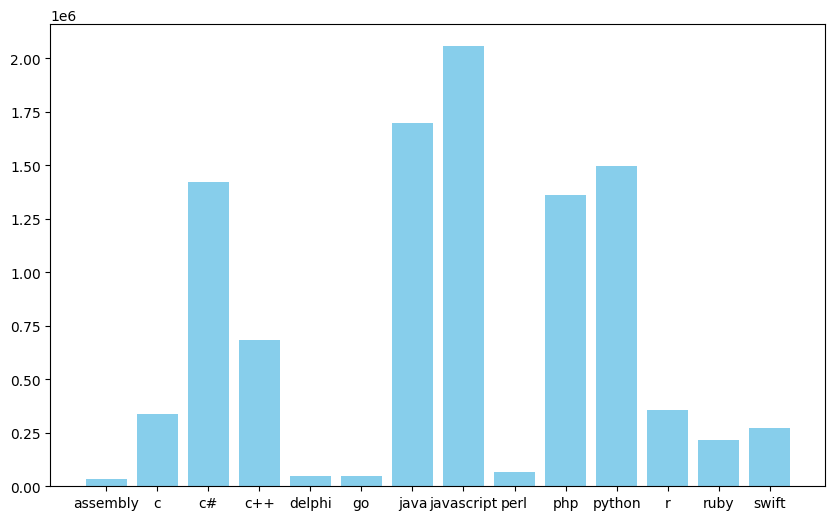

In [38]:
import matplotlib.pyplot as plt
entries_per_lang = df.groupby('LanguageName')['PostCount'].sum().reset_index()
plt.figure(figsize=(10, 6))  #coordinates are used for dimesions of graph >> more readable
plt.bar(entries_per_lang['LanguageName'], entries_per_lang['PostCount'], color='skyblue')

plt.show()



```
`# This is formatted as code`
```

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

In [50]:
import pandas as pd

# Sample DataFrame with numeric data
data = {
    'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
    'PostCount': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
}
df = pd.DataFrame(data)
df.set_index('Date', inplace=False)

# Define the window size
window_size = 5

# Calculate the rolling mean
df['Rolling_Mean'] = df['PostCount'].rolling(window=window_size).mean()

# Print the DataFrame with rolling mean
print(df)


        Date  PostCount  Rolling_Mean
0 2023-01-01         10           NaN
1 2023-01-02         15           NaN
2 2023-01-03         20           NaN
3 2023-01-04         25           NaN
4 2023-01-05         30          20.0
5 2023-01-06         35          25.0
6 2023-01-07         40          30.0
7 2023-01-08         45          35.0
8 2023-01-09         50          40.0
9 2023-01-10         55          45.0
